PART 1 - Explore CSV files containing daily vaccination data per country as well as daily vaccination data broken down by manufacturer.

AIM: This portion of the project aims to assess vaccine rollout per country and furthermore per manufacturer with two main goals. The countries will be arranged by region in order to facilitate visualization and obtain a more worldwide picture.

The first goal is to create a dataframe and visualizations that will aid my teammates in parts three and four as they will analyze the potential correlation between the vaccine rollout per country and their respective topics (covid-related deaths and the economy).

The second and main goal of this section is to assess vaccine rollout per manufacturer and, using the data provided by my teammate in part 1, analyze a potential correlation between this rollout and stock value of each vaccination company.

Research Question: What was the rollout of covid-19 vaccines around the world and can the manufacturer-specific rollout explain the differences in stock value from company to company?

In [103]:
#Import dependencies

import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats as st
from scipy.stats import linregress

In [104]:
#Load the appropriate datasets and read them

vaccination_data_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/Ahmad/Resources/vaccinations1.csv")
manufacturer_data_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/Ahmad/Resources/vaccinations-by-manufacturer.csv")

vaccination_data = pd.read_csv(vaccination_data_to_load)
manufacturer_data = pd.read_csv(manufacturer_data_to_load)

In [105]:
vaccination_data.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


In [106]:
manufacturer_data.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,2020-12-29,Sinopharm/Beijing,1
2,Argentina,2020-12-29,Sputnik V,20493
3,Argentina,2020-12-30,Sputnik V,40595
4,Argentina,2020-12-31,Sputnik V,43401


In [107]:
#Drop the unnecessary columns in the first dataset
columns_to_keep = ["location", "date", "total_vaccinations","people_vaccinated", "people_fully_vaccinated", "total_boosters"]
new_vaccine_df = vaccination_data[columns_to_keep]
new_vaccine_df.head()

,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN


In [108]:
#rename columns for a more refined looking dataset
vaccination_cleaned_df = new_vaccine_df.rename(columns={"total_vaccinations": "Total Vaccinations per Location", "people_vaccinated": "People Vaccinated", "people_fully_vaccinated": "People Fully Vaccinated", "total_boosters": "Total Boosters"})
manufacturer_data_cleaned = manufacturer_data.rename(columns={"total_vaccinations": "Total Vaccinations per Manufacturer"})

In [109]:
vaccination_cleaned_df.head()

,location,date,Total Vaccinations per Location,People Vaccinated,People Fully Vaccinated,Total Boosters
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN


In [110]:
manufacturer_data_cleaned.head()

,location,date,vaccine,Total Vaccinations per Manufacturer
0,Argentina,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,2020-12-29,Sinopharm/Beijing,1
2,Argentina,2020-12-29,Sputnik V,20493
3,Argentina,2020-12-30,Sputnik V,40595
4,Argentina,2020-12-31,Sputnik V,43401


In [111]:
#load csv file provided by teammate in order to arrange countries by set of defined regions
regions_df_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/nazim/Output/output_countries_list_UN_referential.csv")
regions_df = pd.read_csv(regions_df_to_load)

regions_df.head()

,Unnamed: 0,id,iso2Code,name,region,capitalCity,longitude,latitude
0,0,ABW,AW,Aruba,Latin America & Caribbean,Oranjestad,-70.0167,12.5167
1,1,AFE,ZH,Africa Eastern and Southern,Aggregates,NaN,NaN,NaN
2,2,AFG,AF,Afghanistan,South Asia,Kabul,69.1761,34.5228
3,3,AFR,A9,Africa,Aggregates,NaN,NaN,NaN
4,4,AFW,ZI,Africa Western and Central,Aggregates,NaN,NaN,NaN


In [112]:
#clean up dataset above by only keeping essential columns for region classification
columns_kept = ["name", "region"]
regions_df_cleaned = regions_df[columns_kept]

regions_df_refined = regions_df_cleaned.rename(columns={"name": "location"})
regions_df_refined.head()

,location,region
0,Aruba,Latin America & Caribbean
1,Africa Eastern and Southern,Aggregates
2,Afghanistan,South Asia
3,Africa,Aggregates
4,Africa Western and Central,Aggregates


In [114]:
#load csv file provided by teammate in order to arrange countries by set of defined regions
merged_vaccination_df = pd.merge(regions_df_refined, vaccination_cleaned_df, on="location")
merged_manufacturer_df = pd.merge(regions_df_refined, manufacturer_data_cleaned, on="location")

In [115]:
merged_manufacturer_df.head()

,location,region,date,vaccine,Total Vaccinations per Manufacturer
0,Argentina,Latin America & Caribbean,2020-12-29,Oxford/AstraZeneca,1
1,Argentina,Latin America & Caribbean,2020-12-29,Sinopharm/Beijing,1
2,Argentina,Latin America & Caribbean,2020-12-29,Sputnik V,20493
3,Argentina,Latin America & Caribbean,2020-12-30,Sputnik V,40595
4,Argentina,Latin America & Caribbean,2020-12-31,Sputnik V,43401


In [116]:
merged_vaccination_df.head()

,location,region,date,Total Vaccinations per Location,People Vaccinated,People Fully Vaccinated,Total Boosters
0,Aruba,Latin America & Caribbean,2021-03-29,25766.0,15600.0,10166.0,NaN
1,Aruba,Latin America & Caribbean,2021-03-30,NaN,NaN,NaN,NaN
2,Aruba,Latin America & Caribbean,2021-03-31,NaN,NaN,NaN,NaN
3,Aruba,Latin America & Caribbean,2021-04-01,NaN,NaN,NaN,NaN
4,Aruba,Latin America & Caribbean,2021-04-02,NaN,NaN,NaN,NaN


In [23]:
#Export as usable csv files
vaccinations_path = "Output/merged_vaccination_df.csv"
merged_vaccination_df.to_csv(vaccinations_path)

manufacturer_path = "Output/merged_manufacturer_df.csv"
merged_manufacturer_df.to_csv(manufacturer_path)

In [118]:
#Find unique manufacturers to help teammate know which stock data to collect
unique_manufacturers = manufacturer_data_cleaned["vaccine"].unique()
print(unique_manufacturers)

['Oxford/AstraZeneca' 'Sinopharm/Beijing' 'Sputnik V' 'Pfizer/BioNTech'
 'Moderna' 'CanSino' 'Sputnik Light' 'Johnson&Johnson' 'Novavax'
 'Sanofi/GSK' 'Valneva' 'Medicago' 'Sinovac' 'Covaxin' 'SKYCovione']


PART 2 - Visualizations of data, allowing us to get a clear picture of the respective vaccine rollouts

2.1 - VACCINE ROLLOUT IN GENERAL, PER REGION.

In [173]:
merged_vaccine_df_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/Ahmad/Output/merged_vaccination_df.csv")
merged_df = pd.read_csv(merged_vaccine_df_to_load)
merged_df.head()

,Unnamed: 0,location,region,date,Total Vaccinations per Location,People Vaccinated,People Fully Vaccinated,Total Boosters
0,0,Aruba,Latin America & Caribbean,2021-03-29,25766.0,15600.0,10166.0,NaN
1,1,Aruba,Latin America & Caribbean,2021-03-30,NaN,NaN,NaN,NaN
2,2,Aruba,Latin America & Caribbean,2021-03-31,NaN,NaN,NaN,NaN
3,3,Aruba,Latin America & Caribbean,2021-04-01,NaN,NaN,NaN,NaN
4,4,Aruba,Latin America & Caribbean,2021-04-02,NaN,NaN,NaN,NaN


In [174]:
columns_tokeep = ["region", "date", "Total Vaccinations per Location"]
refined_vaccination_df = merged_df[columns_tokeep]
refined_vaccination_df.head()

,region,date,Total Vaccinations per Location
0,Latin America & Caribbean,2021-03-29,25766.0
1,Latin America & Caribbean,2021-03-30,NaN
2,Latin America & Caribbean,2021-03-31,NaN
3,Latin America & Caribbean,2021-04-01,NaN
4,Latin America & Caribbean,2021-04-02,NaN


In [175]:
#Identify unique regions in this dataframe to break down the visualizations
unique_regions1 = refined_vaccination_df["region"].unique()
print(unique_regions1)

['Latin America & Caribbean ' 'South Asia' 'Aggregates'
 'Sub-Saharan Africa ' 'Europe & Central Asia'
 'Middle East & North Africa' 'East Asia & Pacific' 'North America']


In [176]:
#Export this new refined vaccine dataframe as a usable csv file
refined_vaccinations_path = "Output/refined_vaccination_df.csv"
refined_vaccination_df.to_csv(refined_vaccinations_path)

refined_vaccine_df_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/Ahmad/Output/refined_vaccination_df.csv")
refined_vaccination_df = pd.read_csv(refined_vaccine_df_to_load)
refined_vaccination_df.head()

,Unnamed: 0,region,date,Total Vaccinations per Location
0,0,Latin America & Caribbean,2021-03-29,25766.0
1,1,Latin America & Caribbean,2021-03-30,NaN
2,2,Latin America & Caribbean,2021-03-31,NaN
3,3,Latin America & Caribbean,2021-04-01,NaN
4,4,Latin America & Caribbean,2021-04-02,NaN


In [177]:
#Add year column for subsequent visualizations
refined_vaccination_df.loc[:, "date"] = pd.to_datetime(refined_vaccination_df["date"], errors="coerce")
refined_vaccination_df.loc[:, "year"] = refined_vaccination_df["date"].apply(lambda x: x.year if pd.notnull(x) else None)

refined_vaccination_df.head()

,Unnamed: 0,region,date,Total Vaccinations per Location,year
0,0,Latin America & Caribbean,2021-03-29 00:00:00,25766.0,2021
1,1,Latin America & Caribbean,2021-03-30 00:00:00,NaN,2021
2,2,Latin America & Caribbean,2021-03-31 00:00:00,NaN,2021
3,3,Latin America & Caribbean,2021-04-01 00:00:00,NaN,2021
4,4,Latin America & Caribbean,2021-04-02 00:00:00,NaN,2021


In [178]:
#Export this new refined vaccine dataframe with year column as a usable csv file
refined_vaccinations_path = "Output/refined_vaccination_df.csv"
refined_vaccination_df.to_csv(refined_vaccinations_path)

refined_vaccine_df_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/Ahmad/Output/refined_vaccination_df.csv")
final_vaccine_df = pd.read_csv(refined_vaccine_df_to_load)
final_vaccine_df.head()

,Unnamed: 0.1,Unnamed: 0,region,date,Total Vaccinations per Location,year
0,0,0,Latin America & Caribbean,2021-03-29 00:00:00,25766.0,2021
1,1,1,Latin America & Caribbean,2021-03-30 00:00:00,NaN,2021
2,2,2,Latin America & Caribbean,2021-03-31 00:00:00,NaN,2021
3,3,3,Latin America & Caribbean,2021-04-01 00:00:00,NaN,2021
4,4,4,Latin America & Caribbean,2021-04-02 00:00:00,NaN,2021


In [221]:
#Define a function that allows for the formation of a line graph displaying total vaccinations per region
def region_vaccination_line_graph(refined_vaccination_df):
    plt.figure(figsize=(10, 8))
    line_styles = ['-', '--', '-.', ':']
    #Filter for region "Aggregates" as it is unclear what it represents and its data skews the graph
    filtered_df = final_vaccine_df[final_vaccine_df["region"] != "Aggregates"]
    regions = filtered_df["region"].unique()
    
#Create a for loop that loops through the dataset to create a line for every region
    for i, region in enumerate(regions):
        region_vaccine_df = filtered_df[filtered_df["region"] == region]
        yearly_data = region_vaccine_df.groupby("year")["Total Vaccinations per Location"].sum()
        plt.plot(yearly_data.index, yearly_data.values, label=region, linestyle=line_styles[i % len(line_styles)]) 
    
    #Plot the graph
    plt.title("Total Vaccinations Globally")
    plt.xlabel("Year")
    plt.ylabel("Total Vaccinations")
    plt.xticks(yearly_data.index)
    plt.legend()
    plt.savefig(f"Output/Total_Vaccinations_Globally.png")
    plt.show()

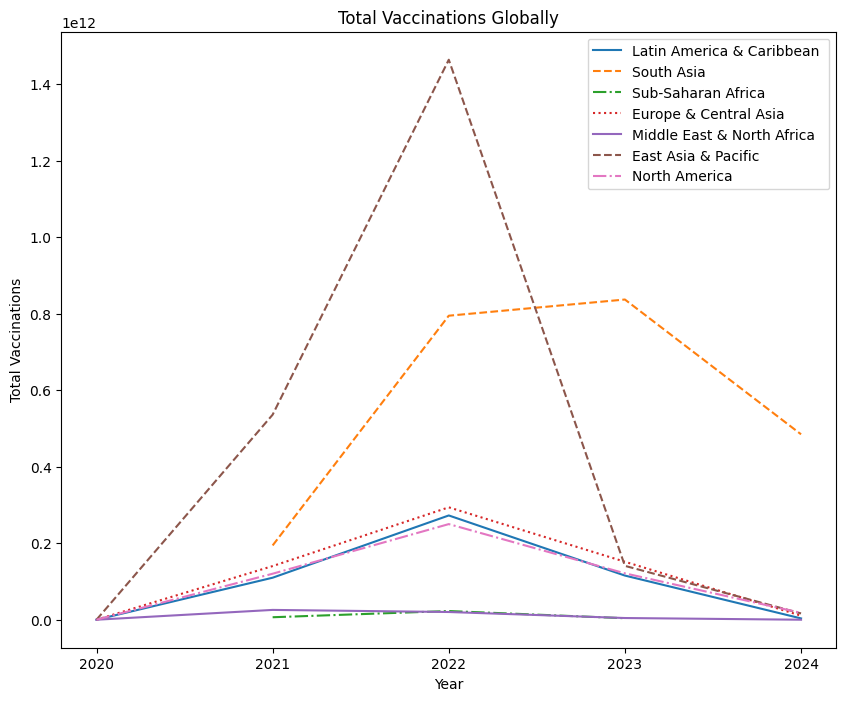

In [222]:
region_vaccination_line_graph(refined_vaccination_df)

2.2 VACCINE ROLLOUT PER MANUFACTURER, PER REGION

In [266]:
#Load csv dataset containing vaccine rollout per manufacturer for visualization
manufacturer_merged_data_to_load = Path("/Users/ahmedmansour/Desktop/datacourse/project1_group2/Ahmad/Output/merged_manufacturer_df.csv")
manufacturers_df = pd.read_csv(manufacturer_merged_data_to_load)

manufacturers_df.head()

,Unnamed: 0,location,region,date,vaccine,Total Vaccinations per Manufacturer
0,0,Argentina,Latin America & Caribbean,2020-12-29,Oxford/AstraZeneca,1
1,1,Argentina,Latin America & Caribbean,2020-12-29,Sinopharm/Beijing,1
2,2,Argentina,Latin America & Caribbean,2020-12-29,Sputnik V,20493
3,3,Argentina,Latin America & Caribbean,2020-12-30,Sputnik V,40595
4,4,Argentina,Latin America & Caribbean,2020-12-31,Sputnik V,43401


In [125]:
#Identify unique regions in this dataframe to break down the visualizations
unique_regions = manufacturers_df["region"].unique()
print(unique_regions)

['Latin America & Caribbean ' 'Europe & Central Asia' 'North America'
 'Aggregates' 'East Asia & Pacific' 'Middle East & North Africa'
 'South Asia' 'Sub-Saharan Africa ']


In [267]:
#Identify unique countries in this dataframe to inform analysis of regions as more or less complete
unique_countries = manufacturers_df["location"].unique()
print(unique_countries)

['Argentina' 'Austria' 'Belgium' 'Bulgaria' 'Canada' 'Switzerland' 'Chile'
 'Cyprus' 'Czechia' 'Germany' 'Denmark' 'Ecuador' 'Spain' 'Estonia'
 'European Union' 'Finland' 'France' 'Croatia' 'Hungary' 'Ireland'
 'Iceland' 'Italy' 'Japan' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Latvia' 'Malta' 'Netherlands' 'Norway' 'Nepal' 'Peru' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Sweden' 'Ukraine' 'Uruguay'
 'United States' 'South Africa']


In [268]:
#Rename regions to allow for manipulation of data
manufacturers_df["region"] = manufacturers_df["region"].str.strip()
replacements = {
    "Latin America & Caribbean": "Latin America and Caribbean", 
    "Europe & Central Asia": "Europe and Central Asia", "East Asia & Pacific": "East Asia and Pacific", 
    "Middle East & North Africa": "Middle East and North Africa"
    }
manufacturers_df["region"] = manufacturers_df["region"].replace(replacements)
manufacturers_df.head()

,Unnamed: 0,location,region,date,vaccine,Total Vaccinations per Manufacturer
0,0,Argentina,Latin America and Caribbean,2020-12-29,Oxford/AstraZeneca,1
1,1,Argentina,Latin America and Caribbean,2020-12-29,Sinopharm/Beijing,1
2,2,Argentina,Latin America and Caribbean,2020-12-29,Sputnik V,20493
3,3,Argentina,Latin America and Caribbean,2020-12-30,Sputnik V,40595
4,4,Argentina,Latin America and Caribbean,2020-12-31,Sputnik V,43401


In [269]:
#Plot a bar chart displaying total number of vaccines administered in a region using a function 
def region_per_manufacturer_bar_chart(manufacturers_df, region_name, color='b'):
    plot_title = f"Total Vaccinations per Manufacturer in {region_name}"
    #First, ensure that the total vaccinations column is in fact numeric
    manufacturers_df["Total Vaccinations per Manufacturer"] = pd.to_numeric(manufacturers_df["Total Vaccinations per Manufacturer"], errors='coerce')

    #Plot for a region, ensuring that total vaccinations are summed for each vaccine type
    region_df = manufacturers_df[manufacturers_df["region"] == region_name]
    grouped_data = region_df.groupby("vaccine", as_index=False)["Total Vaccinations per Manufacturer"].sum()
    vax_names = grouped_data["vaccine"].unique()
    print(vax_names)
    plt.bar(grouped_data["vaccine"], grouped_data["Total Vaccinations per Manufacturer"], color=color)
    plt.title(plot_title)
    plt.xlabel("Vaccine Manufacturer")
    plt.ylabel("Total Vaccinations")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f"Output/{plot_title.strip().lower().replace(' ', '_')}.png")
    plt.show()

['CanSino' 'Moderna' 'Oxford/AstraZeneca' 'Pfizer/BioNTech'
 'Sinopharm/Beijing' 'Sinovac' 'Sputnik Light' 'Sputnik V']


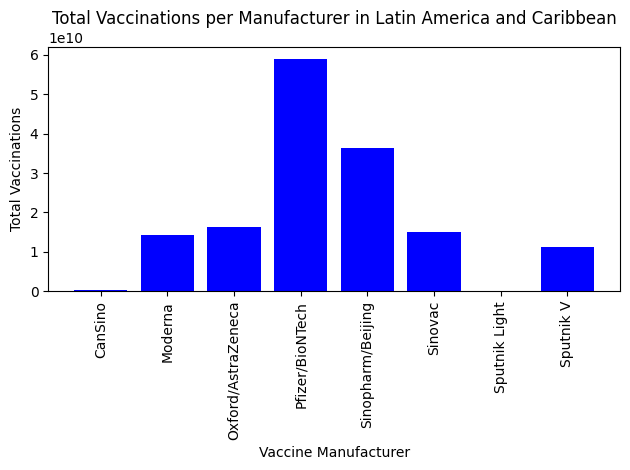

In [270]:
region_per_manufacturer_bar_chart(manufacturers_df, "Latin America and Caribbean", 'b')

As seen on the graph, the top 3 vaccines administered in South America/Caribbean are SinoPharm, AstraZeneca and Pfizer. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat/limitation: major population contributors such as Brazil are missing from this dataframe, meaning this is not entirely a complete picture. That said, there are more countries than was the case for other regions, resulting in a somewhat more complete picture here.

['Covaxin' 'Johnson&Johnson' 'Moderna' 'Novavax' 'Oxford/AstraZeneca'
 'Pfizer/BioNTech' 'Sanofi/GSK' 'Sinopharm/Beijing' 'Sinovac' 'Sputnik V'
 'Valneva']


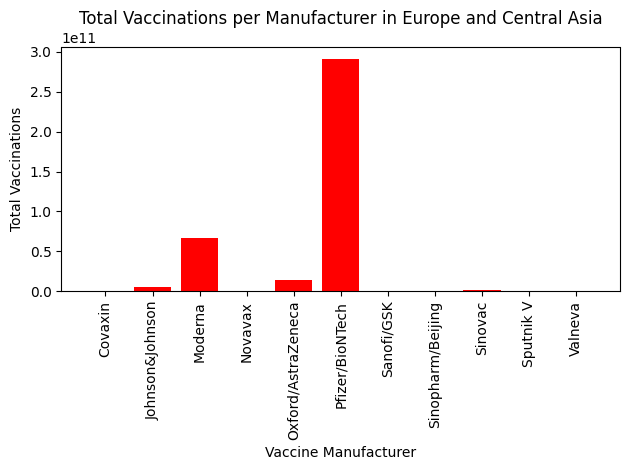

In [271]:
region_per_manufacturer_bar_chart(manufacturers_df, "Europe and Central Asia", 'r')

As seen on the graph, the top 3 vaccines administered in Europe/Central Asia are Pfizer, Moderna and AstraZeneca. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Note: Majority of European countries are included, resulting in a fairly complete picture of reality. However, it cannot be said that this applies to Central Asia as no Central Asian countries are included in this analysis.

['Moderna' 'Novavax' 'Oxford/AstraZeneca' 'Pfizer/BioNTech']


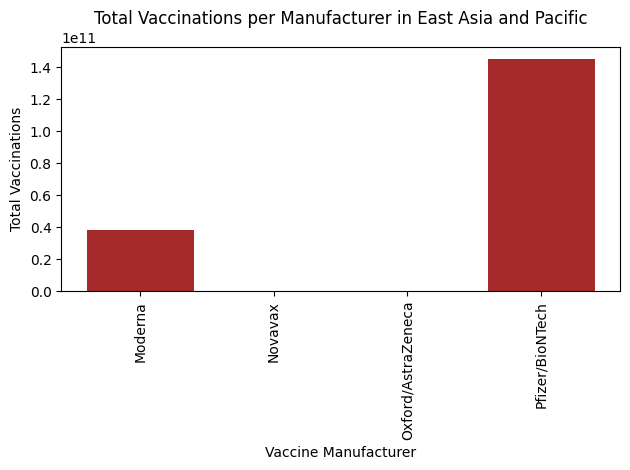

In [272]:
region_per_manufacturer_bar_chart(manufacturers_df, "East Asia and Pacific", 'brown')

As seen on the graph, the top vaccines administered in East Asia/Pacific are Pfizer and Moderna. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat: This dataframe only includes Japan for this region, resulting in a far from complete picture as major players such as South Korea and importantly China are excluded. Thus, this would be more of a particular snapshot as Sinovac would likely be a major player in the region due to China alone.

['Johnson&Johnson' 'Moderna' 'Oxford/AstraZeneca' 'Pfizer/BioNTech']


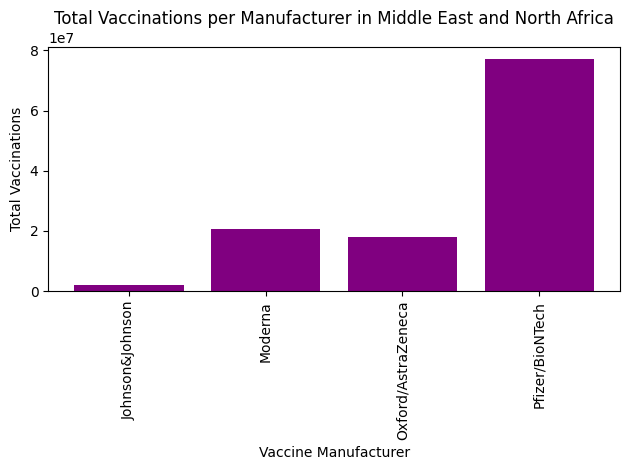

In [273]:
region_per_manufacturer_bar_chart(manufacturers_df, "Middle East and North Africa", 'purple')

As seen on the graph, the top vaccines administered in Middle East/North Africa are Pfizer, Moderna and AstraZeneca. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat: This dataframe only includes Malta for this region, resulting in a far from complete picture as major players such as Egypt, Saudi Arabia and more are excluded. Thus, this would be more of a particular snapshot.

['Johnson&Johnson' 'Pfizer/BioNTech']


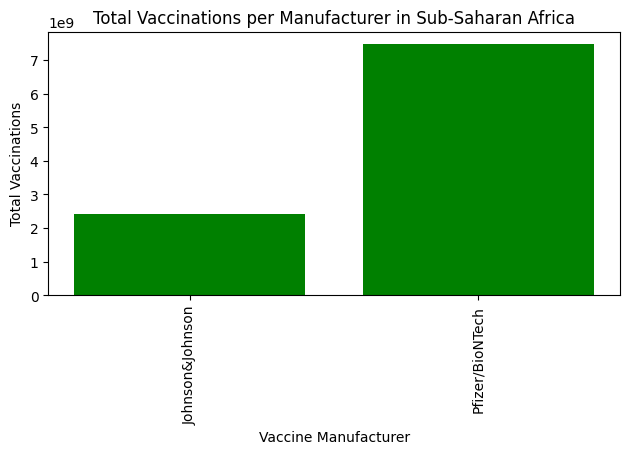

In [274]:
region_per_manufacturer_bar_chart(manufacturers_df, "Sub-Saharan Africa", 'g')

As seen on the graph, the top vaccines administered in Sub-Saharan Africa are Pfizer and Johnson&Johnson. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat: This dataframe only includes South Africa for this region, resulting in a far from complete picture as major players such as the dozens of countries in this region. Thus, this would be more of a particular snapshot.

['Johnson&Johnson' 'Moderna' 'Oxford/AstraZeneca' 'Pfizer/BioNTech'
 'Sinopharm/Beijing']


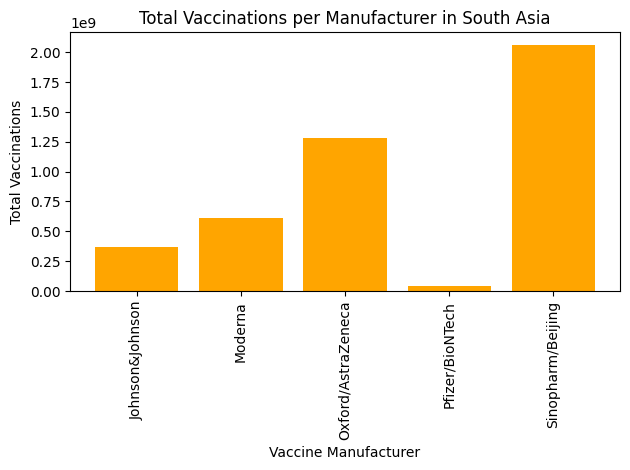

In [275]:
region_per_manufacturer_bar_chart(manufacturers_df, "South Asia", 'orange')

As seen on the graph, the top 3 vaccines administered in South Asia are SinoPharm, AstraZeneca and Moderna. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Caveat/limitation: Nepal is the only country provided in this dataset, resulting in limited analysis for South Asia as a whole.

['Johnson&Johnson' 'Medicago' 'Moderna' 'Novavax' 'Oxford/AstraZeneca'
 'Pfizer/BioNTech']


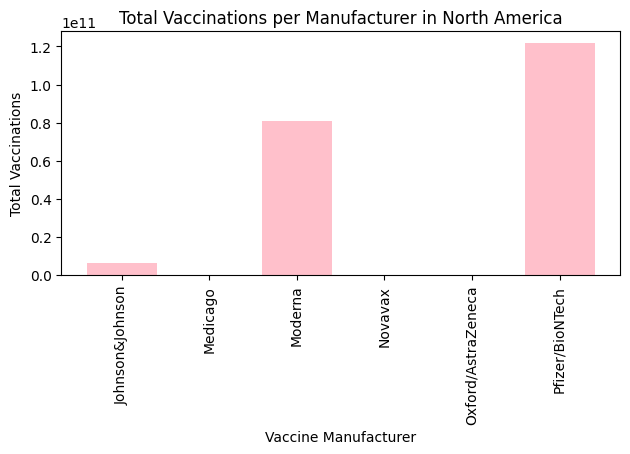

In [276]:
region_per_manufacturer_bar_chart(manufacturers_df, "North America", 'pink')

As seen on the graph, the top 3 vaccines administered in North America are Pfizer, Moderna and Johnson&Johnson. This should be taken into consideration ahead of correlation calculations between vaccine rollout per manufacturer and stock value.

Note: Major countries of North America such as Canada and the US, representing a very large portion of the population of the region are present in this dataset. This is more indicative of the reality of the situation than for South Asia where major players such as India and Pakistan are missing.

2.3 - LINEAR REGRESSION AND POTENTIAL CORRELATION BETWEEN STOCK VALUE FOR EACH MANUFACTURER AND VACCINE ROLLOUT

Following the analysis of the vaccine rollout per manufacturer for every region, I will use the information about the top vaccines worldwide to attempt to see if there is a correlation between this and the value of the stock of their company. Therein lies the main analysis of the hypothesis on whether or not vaccine rollout and the frequency of purcase of particular vaccines is in fact reflected in their stock value. Thus, we can confirm or deny whether this information was useful for investors to know which companies to invest in.

/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_86179/1751233471.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_manufacturers = region_manufacturer_data.groupby("region").apply(lambda x: x.nlargest(2, 'Total Vaccinations per Manufacturer')).reset_index(drop=True)


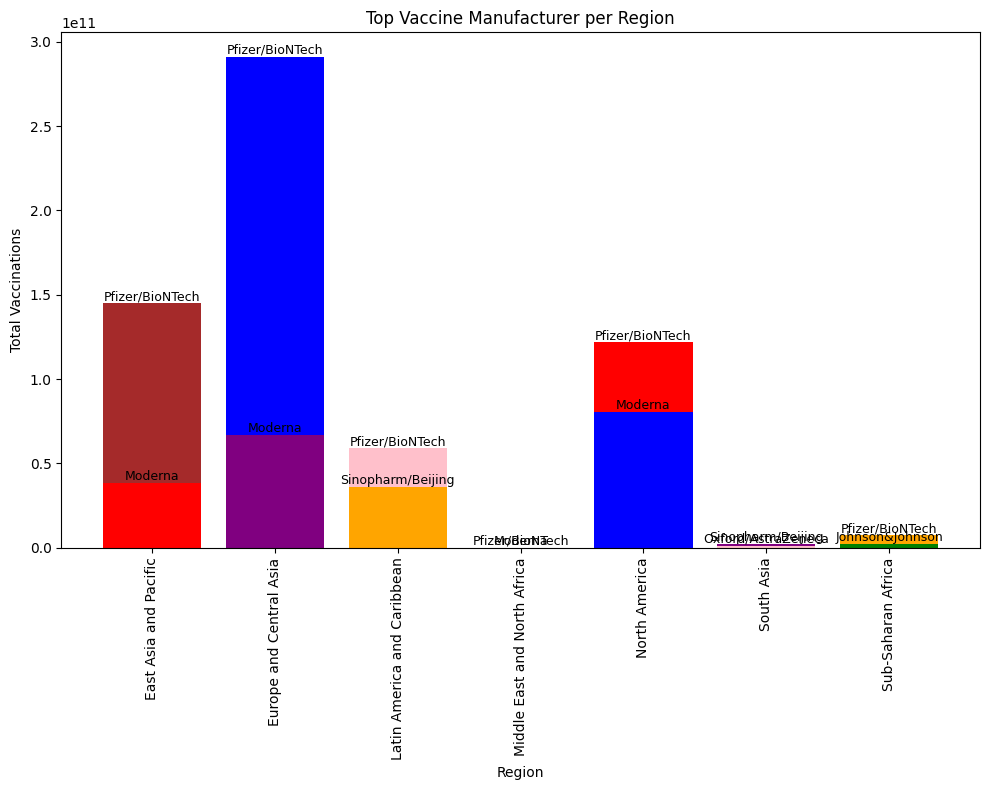

In [248]:
#Form a bar graph displaying top vaccine manufacturer per region to know which linear regression to produce

#Start by filtering out Aggregates as this region is not properly defined and therefore is confusing
filtered_df = manufacturers_df[manufacturers_df["region"] != "Aggregates"]

#Group by vqccine/region data and total vaccinations to identify the top manufacturer per region
region_manufacturer_data = filtered_df.groupby(["region", "vaccine"])["Total Vaccinations per Manufacturer"].sum().reset_index()
top_manufacturers = region_manufacturer_data.groupby("region").apply(lambda x: x.nlargest(2, 'Total Vaccinations per Manufacturer')).reset_index(drop=True)
#Display the data
colors=['brown', 'red', 'blue', 'purple', 'pink', 'orange', 'green']
plt.figure(figsize=(10,8))
bars = plt.bar(top_manufacturers['region'], top_manufacturers['Total Vaccinations per Manufacturer'], color=colors)
for bar, manufacturer in zip(bars, top_manufacturers['vaccine']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), manufacturer, 
             ha='center', va='bottom', fontsize=9)
plt.title("Top 2 Vaccine Manufacturers per Region")
plt.xlabel("Region")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Output/top_vaccine_manufacturers_per_region.png")
plt.show()

/var/folders/x8/wnndqnn93fb22g5jj7f1x0xr0000gn/T/ipykernel_86179/1998783547.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_manufacturers = region_manufacturer_data.groupby("region").apply(lambda x: x.nlargest(2, 'Total Vaccinations per Manufacturer')).reset_index(drop=True)


KeyError: 'vaccine'

<Figure size 1000x800 with 0 Axes>

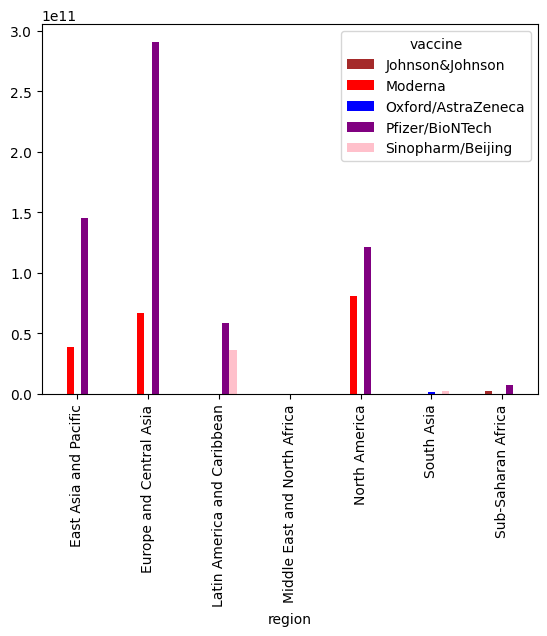

In [281]:

filtered_df = manufacturers_df[manufacturers_df["region"] != "Aggregates"]

#Group by vqccine/region data and total vaccinations to identify the top manufacturer per region
region_manufacturer_data = filtered_df.groupby(["region", "vaccine"])["Total Vaccinations per Manufacturer"].sum().reset_index()
top_manufacturers = region_manufacturer_data.groupby("region").apply(lambda x: x.nlargest(2, 'Total Vaccinations per Manufacturer')).reset_index(drop=True)

top_2_manufacturers = top_manufacturers.reset_index()


# Step 1: Pivot the DataFrame to have 'Date' as columns and 'Ticker' as rows
altered_top_2_df = top_2_manufacturers.pivot(index='region', columns='vaccine', values='Total Vaccinations per Manufacturer')

colors=['brown', 'red', 'blue', 'purple', 'pink', 'orange', 'green']
plt.figure(figsize=(10,8))
bars = altered_top_2_df.plot(kind='bar', color=colors)
for bar, manufacturer in zip(bars, altered_top_2_df['vaccine']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), manufacturer, 
             ha='center', va='bottom', fontsize=9)
plt.title("Top 2 Vaccine Manufacturers per Region")
plt.xlabel("Region")
plt.ylabel("Total Vaccinations")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.savefig("Output/top_vaccine_manufacturers_per_region.png")
plt.show()

This graph is meant to sum up the key piece of information for each specific bar graph in part 2.2, which is the top 2 manufacturers per region. As seen on the graph, Pfizer/BioNTech is the top manufacturer in every single region aside from South Asia, where the top manufacturer is Sinopharm. Nonetheless, they appear to be the top 2 manufacturers globally, which is the information we will use for the linear regression to follow. Moderna seems to be recurring as the 2nd top manufacturer per region except for South Asia, Latin America and Sub-Saharan Africa where they are AstraZeneca, Sinopharm and J&J respectively.

The main question is - is this reflected in their total stock volume and is there in fact a correlation between the vaccine rollout and the stock volume of their individual companies?

In [249]:
#Load dataset provided by teammate on vaccine manufacturer companies' stock volumes
#The following code was provided by my teammate Muskan:
csv_files = {
    'PFE': '/Users/ahmedmansour/Desktop/datacourse/project1_group2/Muskan/Resources/PFE_data.csv',
    'AZN': '/Users/ahmedmansour/Desktop/datacourse/project1_group2/Muskan/Resources/AZN_data.csv',
    'BNTX': '/Users/ahmedmansour/Desktop/datacourse/project1_group2/Muskan/Resources/BNTX_data.csv',
    'MRNA': '/Users/ahmedmansour/Desktop/datacourse/project1_group2/Muskan/Resources/MRNA_data.csv',
    
    'JNJ': '/Users/ahmedmansour/Desktop/datacourse/project1_group2/Muskan/Resources/JNJ_data.csv',
    'GSK': '/Users/ahmedmansour/Desktop/datacourse/project1_group2/Muskan/Resources/GSK_data.csv'
}
combined_data = []
for ticker, file in csv_files.items():

    data = pd.read_csv(file)
    
    data = data[['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    
    
    combined_data.append(data)

combined_df = pd.concat(combined_data, ignore_index=True)
combined_df.to_csv('combined_vaccine_stocks.csv', index=False)
combined_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,PFE,2020-01-02,37.286530,37.333965,36.888046,37.134724,30.443775,16514072
1,PFE,2020-01-03,36.736244,37.229603,36.688805,36.935486,30.280436,14922848
2,PFE,2020-01-06,36.831120,37.001900,36.717270,36.888046,30.241545,15771951
3,PFE,2020-01-07,37.115749,37.125237,36.698292,36.764706,30.140430,20108107
4,PFE,2020-01-08,36.774193,37.210625,36.764706,37.058823,30.381554,16403507


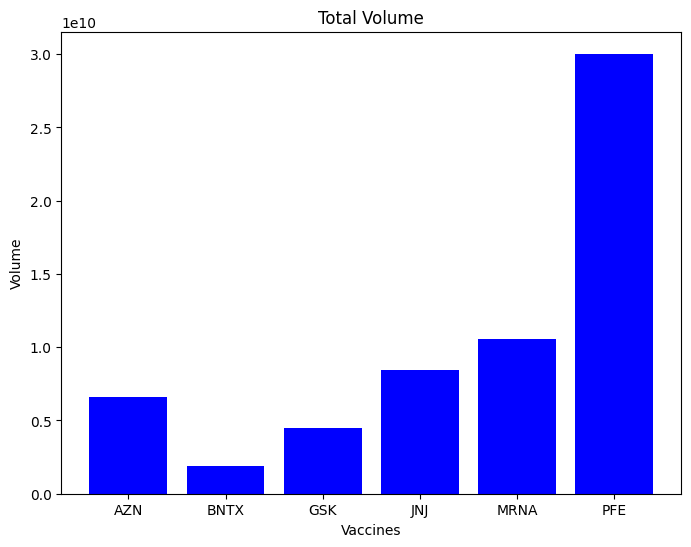

In [250]:
#Groupby and display columns of interest and bar graph of interest
#The following code was also provided by my teammate Muskan:
volume_df=combined_df.groupby('Ticker')['Volume'].sum().reset_index()
volume_df

plt.figure(figsize=(8, 6))
plt.bar(volume_df['Ticker'], volume_df['Volume'], color='blue')
plt.title('Total Volume')
plt.xlabel('Vaccines')
plt.ylabel('Volume')
plt.show()

The graph above shows that the company with the highest stock volume is Pfizer (PFE), which lines up with the results of the graph "Top Vaccine Manufacturer per Region". Now, it is time to perform a linear regression to see if there is indeed a sizable correlation between the two.

In [251]:
volume_df

,Ticker,Volume
0,AZN,6570490200
1,BNTX,1912097400
2,GSK,4504139000
3,JNJ,8456534600
4,MRNA,10536994000
5,PFE,30027788466


In [258]:
top_manufacturers.loc[top_manufacturers['Ticker'] == 'Pfizer/BioNTech', 'Ticker'] = 'PFE'
top_manufacturers.loc[top_manufacturers['Ticker'] == 'Moderna', 'Ticker'] = 'MRNA'
top_manufacturers.loc[top_manufacturers['Ticker'] == 'Oxford/AstraZeneca', 'Ticker'] = 'AZN'
top_manufacturers.loc[top_manufacturers['Ticker'] == 'Johnson&Johnson', 'Ticker'] = 'JNJ'
top_manufacturers.drop(top_manufacturers[top_manufacturers['Ticker'] == 'Sinopharm/Beijing'].index, inplace=True)
top_manufacturers = top_manufacturers.rename(columns={"vaccine": "Ticker"})
top_manufacturers

,region,Ticker,Total Vaccinations per Manufacturer
0,East Asia and Pacific,PFE,145092366624
1,East Asia and Pacific,MRNA,38324060781
2,Europe and Central Asia,PFE,290974082291
3,Europe and Central Asia,MRNA,66803118326
4,Latin America and Caribbean,PFE,58956247788
6,Middle East and North Africa,PFE,77085148
7,Middle East and North Africa,MRNA,20767532
8,North America,PFE,121775713947
9,North America,MRNA,80735658171
11,South Asia,AZN,1284544487


In [259]:
merged_top_manufacturer_df = pd.merge(top_manufacturers, volume_df, on="Ticker")
merged_top_manufacturer_df

,region,Ticker,Total Vaccinations per Manufacturer,Volume
0,East Asia and Pacific,PFE,145092366624,30027788466
1,East Asia and Pacific,MRNA,38324060781,10536994000
2,Europe and Central Asia,PFE,290974082291,30027788466
3,Europe and Central Asia,MRNA,66803118326,10536994000
4,Latin America and Caribbean,PFE,58956247788,30027788466
5,Middle East and North Africa,PFE,77085148,30027788466
6,Middle East and North Africa,MRNA,20767532,10536994000
7,North America,PFE,121775713947,30027788466
8,North America,MRNA,80735658171,10536994000
9,South Asia,AZN,1284544487,6570490200


The r^2-value is: 0.45543779146923175


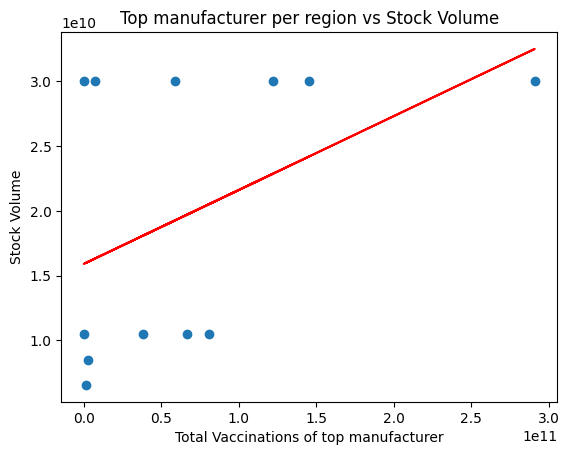

In [260]:
slope, intercept, r_value, p_value, std_err = linregress(merged_top_manufacturer_df["Total Vaccinations per Manufacturer"], merged_top_manufacturer_df["Volume"])
regression_line = slope * merged_top_manufacturer_df["Total Vaccinations per Manufacturer"] + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(merged_top_manufacturer_df["Total Vaccinations per Manufacturer"], merged_top_manufacturer_df["Volume"], marker="o")
plt.title("Top manufacturer per region vs Stock Volume")
plt.xlabel("Total Vaccinations of top manufacturer")
plt.ylabel("Stock Volume")
plt.plot(merged_top_manufacturer_df["Total Vaccinations per Manufacturer"],regression_line,"r-")
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
print(f"The r^2-value is: {r_value}")

plt.show()

As seen above, the r value is roughly 0.46, which indicates a very moderate correlation between total stock volume and vaccine rollout per manufacturer. Thus, it cannot be said with great confidence that there is a correlation between the two, although logically the stock volumes tend to match up with the vaccine rollouts. Statistically, there isn't a strong enough correlation between the two.